In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv('emails.csv')
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
ham = spam_df[ spam_df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam = spam_df[ spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [10]:
print('Spam% =', (len(spam)/len(spam_df)*100))

Spam% = 23.88268156424581


In [11]:
print('Ham% =', (len(ham)/len(spam_df)*100))

Ham% = 76.11731843575419


Text(0.5, 1.0, 'Count of Spam vs. Ham Messages')

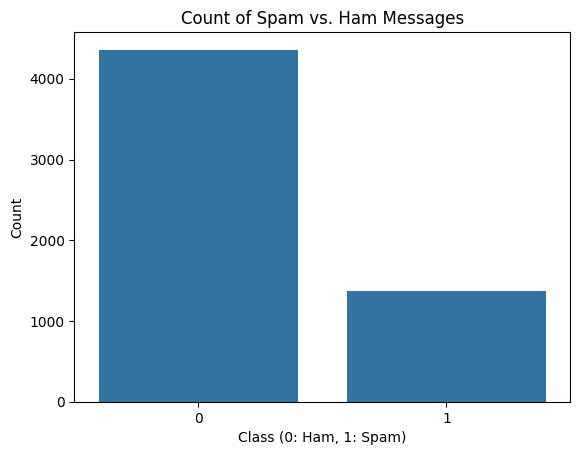

In [15]:
sns.countplot(x = 'spam', data = spam_df)
plt.xlabel('Class (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.title('Count of Spam vs. Ham Messages')

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = [ 'this is the first doc', 'this is the second doc', 'this is third doc', 'this is the first one?']

sample_vectorizer = CountVectorizer()

X = sample_vectorizer.fit_transform(sample_data)

print(X.toarray())

[[1 1 1 0 0 1 0 1]
 [1 0 1 0 1 1 0 1]
 [1 0 1 0 0 0 1 1]
 [0 1 1 1 0 1 0 1]]


In [20]:
print(sample_vectorizer.get_feature_names_out())

['doc' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [21]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [23]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [24]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
spamham_countvectorizer.shape

(5728, 37303)

In [26]:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [28]:
testing_sample = ['Free Money!!', 'Hi Kim, Please let me know if you need any other information. Thanks.']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [29]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [31]:
X = spamham_countvectorizer
y = label

print("shape of X:", X.shape, "\nshape of y:", y.shape)

shape of X: (5728, 37303) 
shape of y: (5728,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 1, 0, 0])

<Axes: >

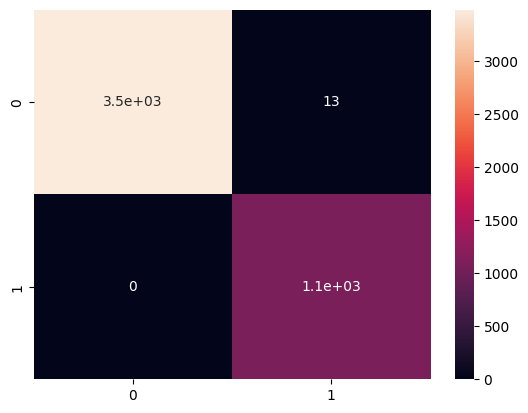

In [36]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

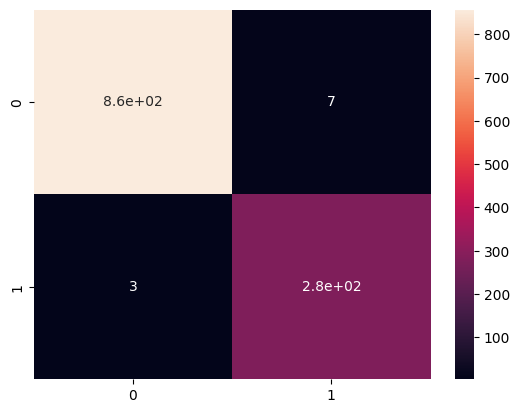

In [37]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [38]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       864
           1       0.98      0.99      0.98       282

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

